# Fase 4

## Modelado

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [313]:
csv = 'dataset/weatherAUS_LocationsCiudadesSiCosteras.csv'
df = pd.read_csv(csv,sep=",")

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30271 entries, 0 to 30270
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              29879 non-null  float64
 1   MaxTemp              30061 non-null  float64
 2   Rainfall             30060 non-null  float64
 3   Evaporation          17340 non-null  float64
 4   Sunshine             16753 non-null  float64
 5   WindGustSpeed        23103 non-null  float64
 6   WindSpeed9am         29950 non-null  float64
 7   WindSpeed3pm         28624 non-null  float64
 8   Humidity9am          29685 non-null  float64
 9   Humidity3pm          28393 non-null  float64
 10  Pressure9am          27073 non-null  float64
 11  Pressure3pm          27108 non-null  float64
 12  Cloud9am             21290 non-null  float64
 13  Cloud3pm             19798 non-null  float64
 14  Temp9am              29981 non-null  float64
 15  Temp3pm              28678 non-null 

In [315]:
#df = df.dropna()
df.isna().sum()

MinTemp                  392
MaxTemp                  210
Rainfall                 211
Evaporation            12931
Sunshine               13518
WindGustSpeed           7168
WindSpeed9am             321
WindSpeed3pm            1647
Humidity9am              586
Humidity3pm             1878
Pressure9am             3198
Pressure3pm             3163
Cloud9am                8981
Cloud3pm               10473
Temp9am                  290
Temp3pm                 1593
RISK_MM                    0
WindSpeedMax             193
WindSpeedMin             193
WindSpeedMean            193
Latitud                    0
Longitud                   0
Year                       0
Month                      0
Day                        0
Week                       0
LocationEncoder            0
WindDir9amEncoder          0
WindDir3pmEncoder          0
WindGustDirEncoder         0
Is_CoastalEncoder          0
RainTomorrowEncoder        0
RainTodayEncoder           0
dtype: int64

### Preparar datos para modelos

In [316]:
df = df.copy()
conjunto_de_datos_para_primer_modelo = df



In [317]:
conjunto_de_datos_para_primer_modelo.isna().sum()

MinTemp                  392
MaxTemp                  210
Rainfall                 211
Evaporation            12931
Sunshine               13518
WindGustSpeed           7168
WindSpeed9am             321
WindSpeed3pm            1647
Humidity9am              586
Humidity3pm             1878
Pressure9am             3198
Pressure3pm             3163
Cloud9am                8981
Cloud3pm               10473
Temp9am                  290
Temp3pm                 1593
RISK_MM                    0
WindSpeedMax             193
WindSpeedMin             193
WindSpeedMean            193
Latitud                    0
Longitud                   0
Year                       0
Month                      0
Day                        0
Week                       0
LocationEncoder            0
WindDir9amEncoder          0
WindDir3pmEncoder          0
WindGustDirEncoder         0
Is_CoastalEncoder          0
RainTomorrowEncoder        0
RainTodayEncoder           0
dtype: int64

In [318]:
conjunto_de_datos_para_primer_modelo = conjunto_de_datos_para_primer_modelo.dropna()

In [319]:

X = conjunto_de_datos_para_primer_modelo.drop(['LocationEncoder'], axis=1)
y = conjunto_de_datos_para_primer_modelo['LocationEncoder']


# standardization
stscaler= StandardScaler()
X_scale = stscaler.fit_transform(X)
# split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.33, random_state = 42)


In [320]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((7832, 32), (3858, 32))

#### Randomm Forest

In [321]:
# inicializar el clasificador
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
rfc = RandomForestClassifier( random_state=0, criterion='entropy')

# entrenar el modelo
rfc.fit(X_train, y_train)

# predecir el conjunto de x test
y_pred = rfc.predict(X_test)


# revisar la precisión del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 1.0000


#### Validación cruzada

In [322]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Suponiendo que tienes tus datos X e y
# X son tus características y y es tu variable objetivo

# Inicializa tu modelo de Random Forest
#modelo = RandomForestClassifier()

# Realiza la validación cruzada
puntuaciones = cross_val_score(rfc, X, y, cv=5)  # cv=5 para una validación cruzada de 5-folds

# Muestra las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", puntuaciones)

# Calcula la media y la desviación estándar de las puntuaciones
media_puntuaciones = np.mean(puntuaciones)
std_puntuaciones = np.std(puntuaciones)
print("Media de las puntuaciones:", media_puntuaciones)
print("Desviación estándar de las puntuaciones:", std_puntuaciones)


Puntuaciones de validación cruzada: [1. 1. 1. 1. 1.]
Media de las puntuaciones: 1.0
Desviación estándar de las puntuaciones: 0.0


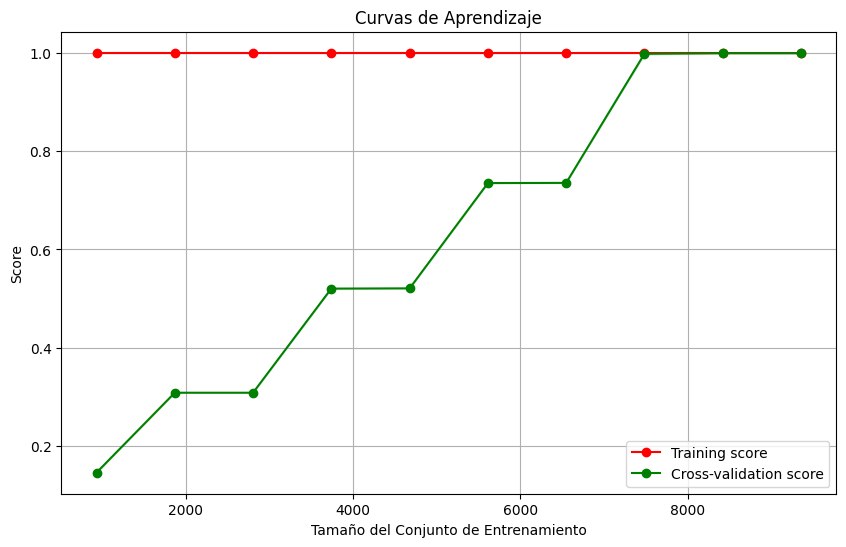

In [323]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title("Curvas de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Utiliza la función plot_learning_curve con tu modelo y datos
plot_learning_curve(rfc, X, y)


#### SVM

In [324]:
# suport vector machine clasifier
# https://scikit-learn.org/stable/api/sklearn.svm.html#module-sklearn.svm
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._valida

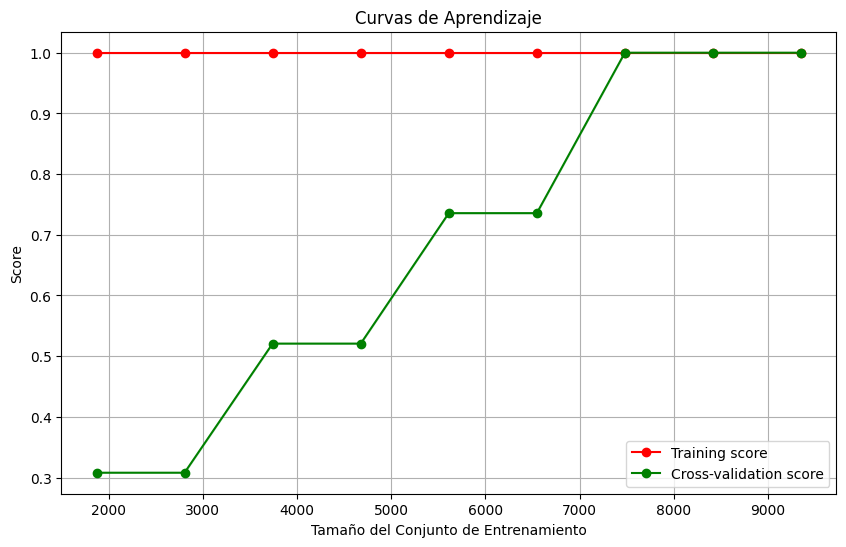

In [325]:
plot_learning_curve(clf, X, y)

#### GridSearchSV


In [326]:

from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Crear un objeto de GridSearchCV
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo objeto de SVM con los mejores hiperparámetros
clf = svm.SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

# Entrenar el modelo con los mejores hiperparámetros
clf.fit(X_train, y_train)

# Predecir el conjunto de x_test
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
print("Precisión: ", metrics.accuracy_score(y_test, y_pred))

Precisión:  1.0


/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/workspaces/duoc-BIY7121/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._valida

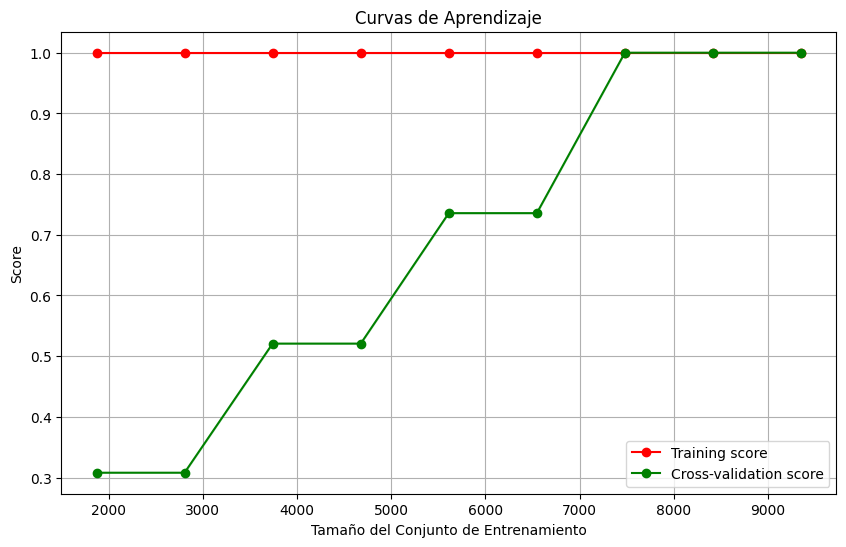

In [327]:

plot_learning_curve(clf, X, y)

In [328]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Error cuadrático medio: {:.2f}'.format(mse))
print('Coeficiente de determinación: {:.2f}'.format(r2))

Error cuadrático medio: 35.25
Coeficiente de determinación: 0.55


In [329]:
X = df[['WindSpeedMax','WindSpeedMin','Week']]
y = df['LocationEncoder']

# Divide tus datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa y ajusta TPOT
#tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42, n_jobs=1)
#tpot.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
#print(f"Accuracy: {tpot.score(X_test, y_test)}")
#tpot.export('tpot_best_model_pipeline.py')